# Imports & Download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch torchvision

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("aggr8/brain_mri_train_test_split")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/537 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/11.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/7.88M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/480 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

# Assignment 1 COL828



## Dataset Loading & Visualization

In [ ]:
from datasets import load_dataset

ds = load_dataset("aggr8/brain_mri_train_test_split")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/480 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 480
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 320
    })
})


In [ ]:
print(ds["train"])

Dataset({
    features: ['image', 'label'],
    num_rows: 480
})


Train Distribution: {1: 124, 3: 118, 2: 129, 0: 109}
Test Distribution: {1: 76, 2: 71, 3: 82, 0: 91}


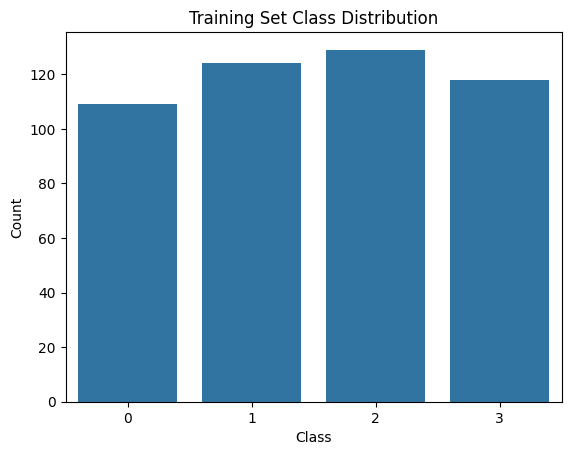

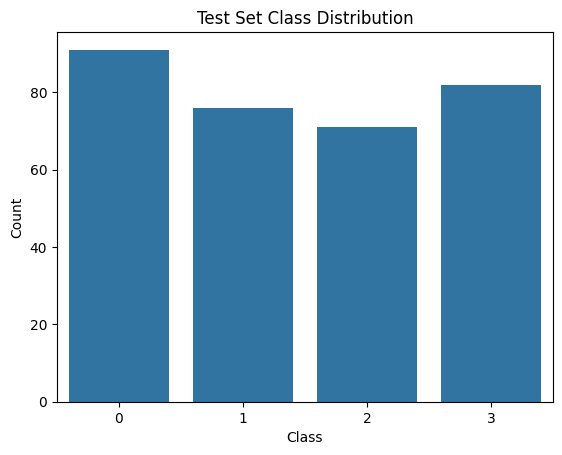

In [ ]:
# Extract class distribution
from collections import Counter

train_labels = ds['train']['label']
test_labels = ds['test']['label']

train_distribution = dict(Counter(train_labels))
test_distribution = dict(Counter(test_labels))

print("Train Distribution:", train_distribution)
print("Test Distribution:", test_distribution)

import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution of classes in the training and test sets
def plot_distribution(distribution, title):
    sns.barplot(x=list(distribution.keys()), y=list(distribution.values()))
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Plot distributions
plot_distribution(train_distribution, "Training Set Class Distribution")
plot_distribution(test_distribution, "Test Set Class Distribution")


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=318x354 at 0x7DA3FA53FF10>


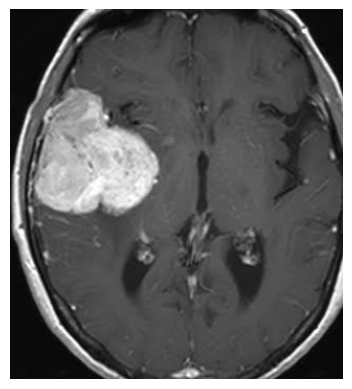

In [ ]:
import matplotlib.pyplot as plt

for image in ds['train']['image']:
  print(image)
  plt.imshow(image)
  plt.axis("off")
  plt.show()
  break


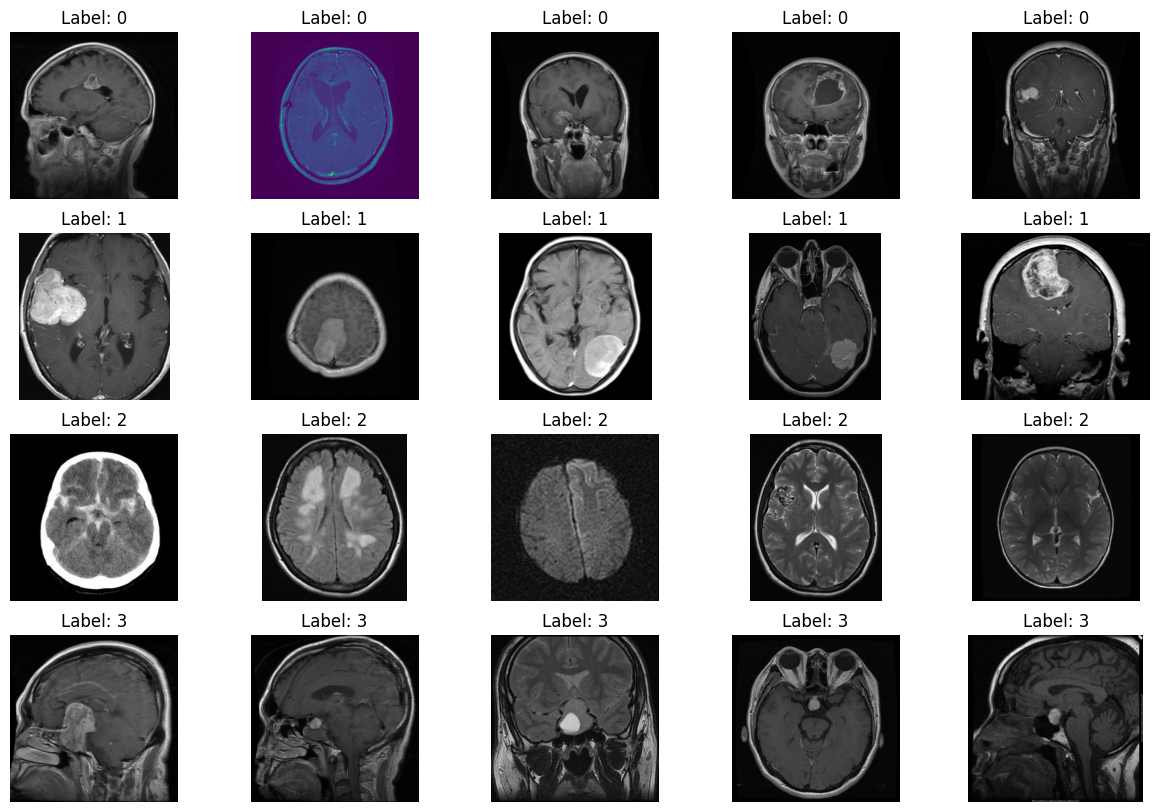

In [ ]:
import matplotlib.pyplot as plt

# Function to display a few images from each class
def display_images(dataset, n_images=5):
    labels = dataset['label']
    unique_labels = set(labels)

    plt.figure(figsize=(15, 10))

    for idx, label in enumerate(unique_labels):
        indices = [i for i, l in enumerate(labels) if l == label]
        for i in range(n_images):
            plt.subplot(len(unique_labels), n_images, idx * n_images + i + 1)
            plt.imshow(dataset['image'][indices[i]])
            plt.title(f"Label: {label}")
            plt.axis("off")

    plt.show()

# Display sample images from the train set
display_images(ds['train'])


## Data Preprocessing

In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(text=["a photo of a cat", "a photo of a dog", "a photo of a man"], images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
inputs = processor(text=["a photo of a cat", "a photo of a dog", "a photo of a man"], images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)

In [ ]:
print(logits_per_image)
print("Probabilities: ",probs)

tensor([[22.7387, 15.6618, 15.7724]], grad_fn=<TBackward0>)
Probabilities:  tensor([[9.9822e-01, 8.4290e-04, 9.4149e-04]], grad_fn=<SoftmaxBackward0>)


## Zero Shot

In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import torch

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

text_prompts = ["a photo of glioma tumor",
                "a photo of meningioma tumor",
                "a photo of no tumor",
                "a photo of pituitary tumor"]


text_inputs = processor(text=text_prompts, return_tensors="pt", padding=True)

# Function to evaluate accuracy on the test set




File saved to Google Drive.


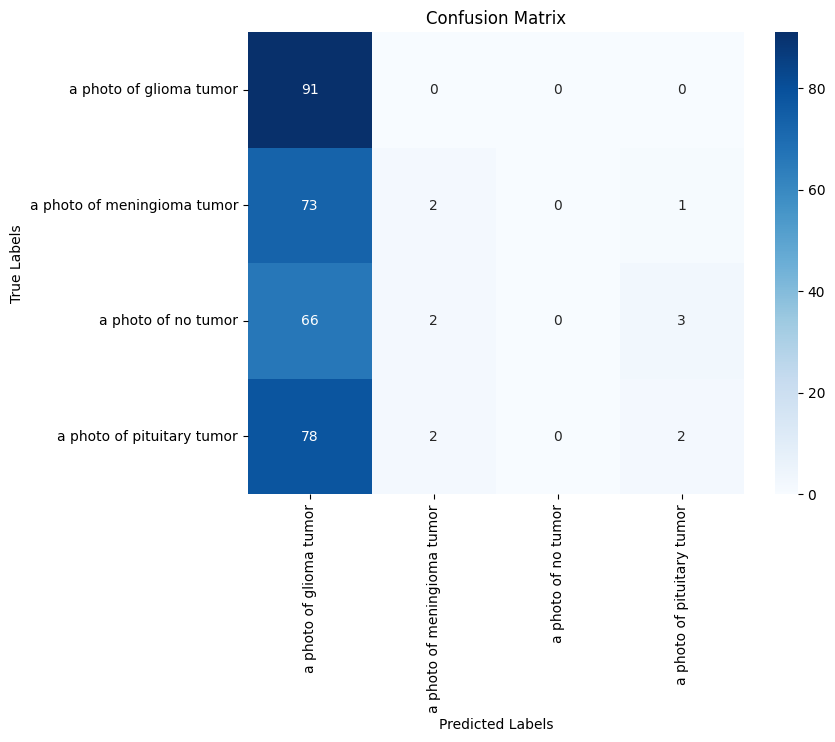

ROC AUC Score: 0.59


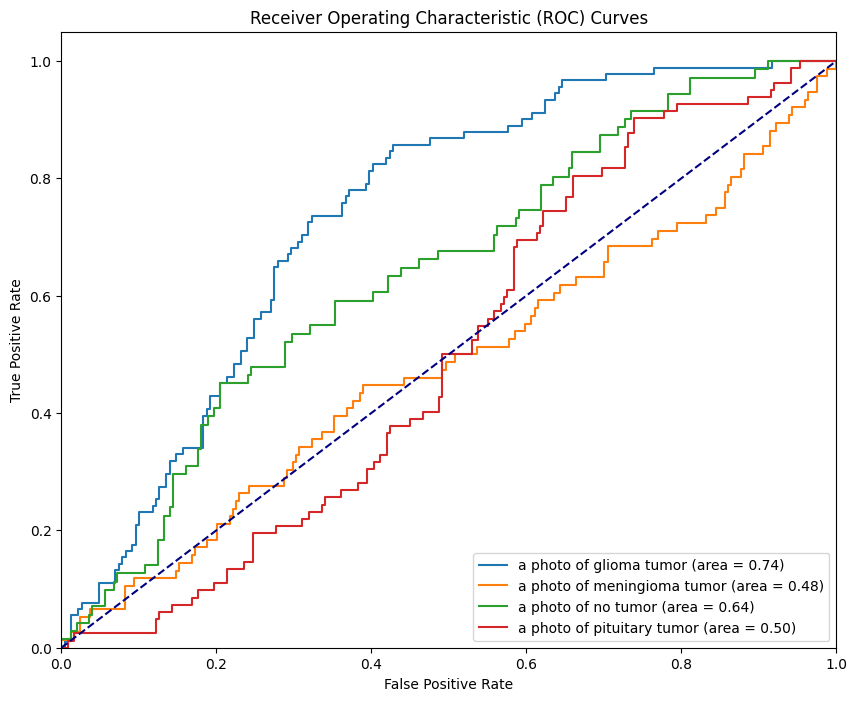

In [ ]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from datasets import load_dataset
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


# Function to evaluate model and generate metrics
def evaluate_model(ds, model, processor, text_inputs):
    y_true = []
    y_pred = []
    y_probs = []

    total_samples = len(ds['test'])

    for i in range(total_samples):
        image = ds['test'][i]['image']

        # Process the image
        image_inputs = processor(images=image, return_tensors="pt", padding=True)

        # Perform forward pass
        with torch.no_grad():
            outputs = model(**{**text_inputs, **image_inputs})

        # Get the similarity scores
        logits_per_image = outputs.logits_per_image

        # Convert logits to probabilities
        probs = logits_per_image.softmax(dim=1)

        # Get the predicted label
        predicted_label = torch.argmax(probs, dim=1).item()

        # Append true and predicted labels and probabilities
        y_true.append(ds['test'][i]['label'])
        y_pred.append(predicted_label)
        y_probs.append(probs.squeeze().numpy())

    return y_true, y_pred, y_probs

# Evaluate the model
y_true, y_pred, y_probs = evaluate_model(ds, model, processor, text_inputs)

# Save predictions and probabilities to CSV in Google Drive
results_df = pd.DataFrame({
    'True Label': y_true,
    'Predicted Label': y_pred,
    'Glioma Probability': [prob[0] for prob in y_probs],
    'Meningioma Probability': [prob[1] for prob in y_probs],
    'No Tumor Probability': [prob[2] for prob in y_probs],
    'Pituitary Probability': [prob[3] for prob in y_probs]
})
results_df.to_csv('/content/drive/My Drive/Data/clip_vit_test_results.csv', index=False)

print("File saved to Google Drive.")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=text_prompts, yticklabels=text_prompts)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC
y_true_bin = np.eye(len(text_prompts))[y_true]  # One-hot encoding of true labels
roc_auc = roc_auc_score(y_true_bin, y_probs, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plotting ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(text_prompts)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_probs)[:, i])
    plt.plot(fpr, tpr, label=f'{text_prompts[i]} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: accuracy calculation using y_true, y_pred, y_probs

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 29.69%


In [ ]:
text_prompts = ["a photo of CT scan",
                "a photo of glioma tumor",
                "a photo of meningioma tumor",
                "a photo of pituitary tumor"]

File saved to Google Drive.


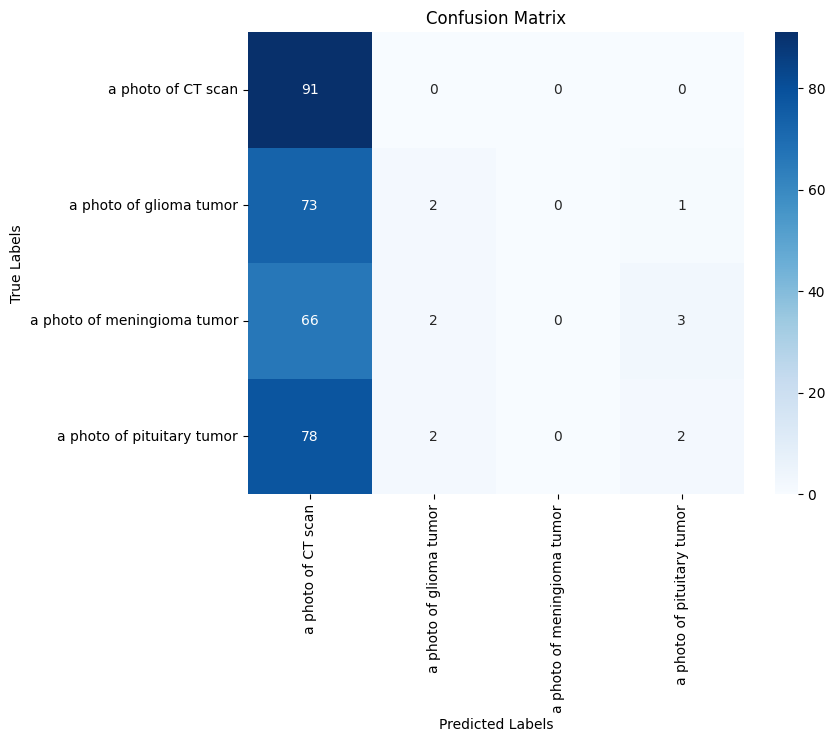

ROC AUC Score: 0.59


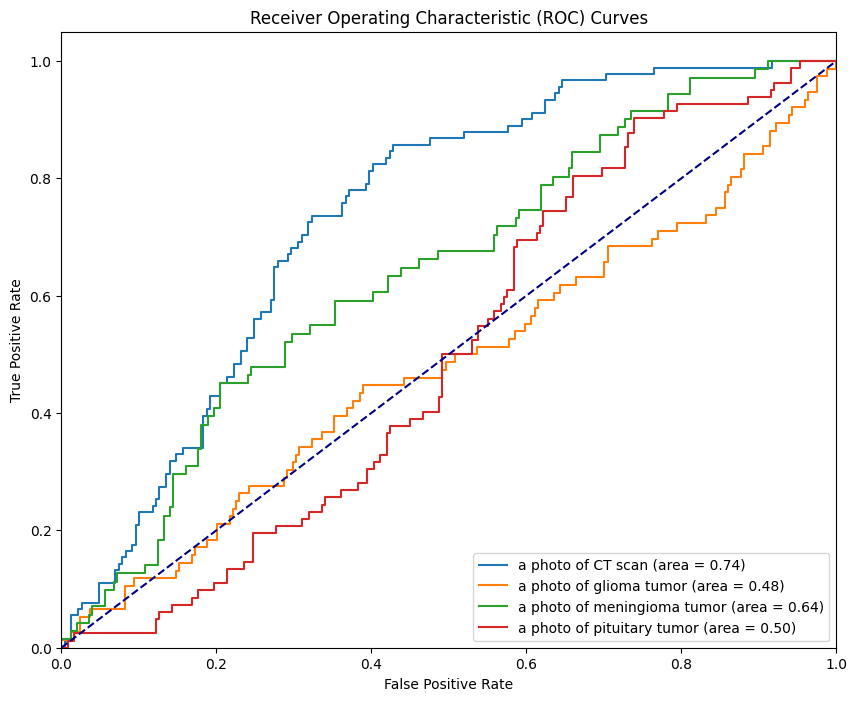

In [ ]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from datasets import load_dataset
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


# Function to evaluate model and generate metrics
def evaluate_model(ds, model, processor, text_inputs):
    y_true = []
    y_pred = []
    y_probs = []

    total_samples = len(ds['test'])

    for i in range(total_samples):
        image = ds['test'][i]['image']

        # Process the image
        image_inputs = processor(images=image, return_tensors="pt", padding=True)

        # Perform forward pass
        with torch.no_grad():
            outputs = model(**{**text_inputs, **image_inputs})

        # Get the similarity scores
        logits_per_image = outputs.logits_per_image

        # Convert logits to probabilities
        probs = logits_per_image.softmax(dim=1)

        # Get the predicted label
        predicted_label = torch.argmax(probs, dim=1).item()

        # Append true and predicted labels and probabilities
        y_true.append(ds['test'][i]['label'])
        y_pred.append(predicted_label)
        y_probs.append(probs.squeeze().numpy())

    return y_true, y_pred, y_probs

# Evaluate the model
y_true, y_pred, y_probs = evaluate_model(ds, model, processor, text_inputs)

# Save predictions and probabilities to CSV in Google Drive
results_df = pd.DataFrame({
    'True Label': y_true,
    'Predicted Label': y_pred,
    'Glioma Probability': [prob[0] for prob in y_probs],
    'Meningioma Probability': [prob[1] for prob in y_probs],
    'No Tumor Probability': [prob[2] for prob in y_probs],
    'Pituitary Probability': [prob[3] for prob in y_probs]
})
results_df.to_csv('/content/drive/My Drive/Data/clip_vit_test_results.csv', index=False)

print("File saved to Google Drive.")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=text_prompts, yticklabels=text_prompts)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC
y_true_bin = np.eye(len(text_prompts))[y_true]  # One-hot encoding of true labels
roc_auc = roc_auc_score(y_true_bin, y_probs, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plotting ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(text_prompts)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_probs)[:, i])
    plt.plot(fpr, tpr, label=f'{text_prompts[i]} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 29.69%


# CLIP Fine Tunning

In [ ]:
# all imports

import json
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F


from transformers import CLIPProcessor, CLIPModel

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
train_data_images = ds['train']['image']
train_data_labels = ds['train']['label']
test_data_images = ds['test']['image']
test_data_labels = ds['test']['label']

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

text_prompts = ["a photo of glioma tumor", "a photo of meningioma tumor", "a photo of no tumor", "a photo of pituitary tumor"]

class CustomImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = [text_prompts[label] for label in labels]
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),  # Ensure RGB format
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
])

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model.train()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
train_dataset = CustomImageDataset(images=train_data_images, labels=train_data_labels, transform=preprocess)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm
from transformers import CLIPModel, CLIPProcessor
import matplotlib.pyplot as plt
import torch.nn as nn

# Assuming ds is predefined and loaded with data
train_data_images = ds['train']['image']
train_data_labels = ds['train']['label']
test_data_images = ds['test']['image']
test_data_labels = ds['test']['label']

text_prompts = ["a photo of glioma tumor", "a photo of meningioma tumor", "a photo of no tumor", "a photo of pituitary tumor"]


class CustomImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),  # Ensure RGB format
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
])

# Initialize model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model.train()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:

import numpy as np

train_dataset = CustomImageDataset(images=train_data_images, labels=train_data_labels, transform=preprocess)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomImageDataset(images=test_data_images, labels=test_data_labels, transform=preprocess)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
loss_fn = nn.CrossEntropyLoss()


best_accuracy_sum = 0  # Variable to store the best combined accuracy
best_model_path = "/content/drive/My Drive/Data/COL828/full_finetune_best_model.pth"  # Path to save the best model


n_epochs = 15
epoches = []
train_acc = []
test_acc = []

for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}/{n_epochs}")
    correct_labels = []
    predicted_labels = []
    probs = []

    model.train()

    for i, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        images, labels = batch
        if(i==0 and epoch==0):
            print(images.shape)
            print(images)
            print("============================================")
        images, labels = images.to(device), labels.to(device)


        # forward pass
        text_inputs = processor(text=text_prompts, return_tensors="pt", padding=True, truncation=True).to(device)
        text_features = model.get_text_features(**text_inputs)
        image_features = model.get_image_features(images)

        # Calculate cosine similarity
        cosine_sim = torch.nn.functional.cosine_similarity(image_features.unsqueeze(1), text_features.unsqueeze(0), dim=-1)

        loss = loss_fn(cosine_sim, labels)

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)
        optimizer.step()
        # correct prediction count
        correct_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(torch.argmax(cosine_sim, dim=1).cpu().numpy())
        scheduler.step()

        print(f"Epoch {epoch+1}/{n_epochs}, Batch {i+1}, Loss: {loss.item():.4f}")

    # Print current training accuracy
    accuracy_curr = sum(np.array(correct_labels) == np.array(predicted_labels)) / len(correct_labels)
    print(f"Training Accuracy: {accuracy_curr * 100:.2f}%")
    train_acc.append(accuracy_curr)
    epoches.append(epoch)

    model.eval()
    true_labels = []
    pred_labels = []

    # Perform testing
    with torch.no_grad():
        for batch in test_dataloader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            # Generate text features
            text_inputs = processor(text=text_prompts, return_tensors="pt", padding=True, truncation=True).to(device)
            text_features = model.get_text_features(**text_inputs)
            image_features = model.get_image_features(images)

            # Calculate cosine similarity
            cosine_sim = torch.nn.functional.cosine_similarity(image_features.unsqueeze(1), text_features.unsqueeze(0), dim=-1)

            # Get predictions
            preds = torch.argmax(cosine_sim, dim=1)

            # Collect true and predicted labels
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # testing accuracy
    accuracy_test = sum(np.array(true_labels) == np.array(pred_labels)) / len(true_labels)
    print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")
    test_acc.append(accuracy_test)

    accuracy_sum = accuracy_curr + accuracy_test

    # Save the best model based on the maximum (train + test) accuracy
    if accuracy_sum > best_accuracy_sum:
        best_accuracy_sum = accuracy_sum
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with combined accuracy {best_accuracy_sum * 100:.2f}%")



# Plot accuracy test and training accracy vs epoch in same image
plt.plot(epoches, train_acc, label='Training Accuracy')
plt.plot(epoches, test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')


Epoch 1/15
torch.Size([32, 3, 224, 224])
tensor([[[[-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          ...,
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923]],

         [[-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          ...,
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521]],

         [[-1.4802, -1.4802, -1.4802,  ..., -1.4802, -1.4802,

KeyboardInterrupt: 

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

preprocess = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomRotation(10),
    # transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),  # Ensure RGB format
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5], std=[0.5])
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
])

Epoch 1/15
Epoch 1/15, Batch 1, Loss: 1.1106
Epoch 1/15, Batch 2, Loss: 1.3864
Epoch 1/15, Batch 3, Loss: 1.3867
Epoch 1/15, Batch 4, Loss: 1.3861
Epoch 1/15, Batch 5, Loss: 1.3855
Epoch 1/15, Batch 6, Loss: 1.3857
Epoch 1/15, Batch 7, Loss: 1.3853
Epoch 1/15, Batch 8, Loss: 1.3875
Epoch 1/15, Batch 9, Loss: 1.3868
Epoch 1/15, Batch 10, Loss: 1.3859
Epoch 1/15, Batch 11, Loss: 1.3894
Epoch 1/15, Batch 12, Loss: 1.3864
Epoch 1/15, Batch 13, Loss: 1.3868
Epoch 1/15, Batch 14, Loss: 1.3876
Epoch 1/15, Batch 15, Loss: 1.3870
Training Accuracy: 25.42%
Testing Accuracy: 25.62%
Best model saved with combined accuracy 51.04%
Epoch 2/15
Epoch 2/15, Batch 1, Loss: 1.3872
Epoch 2/15, Batch 2, Loss: 1.3870
Epoch 2/15, Batch 3, Loss: 1.3849
Epoch 2/15, Batch 4, Loss: 1.3864
Epoch 2/15, Batch 5, Loss: 1.3862
Epoch 2/15, Batch 6, Loss: 1.3866
Epoch 2/15, Batch 7, Loss: 1.3871
Epoch 2/15, Batch 8, Loss: 1.3851
Epoch 2/15, Batch 9, Loss: 1.3875
Epoch 2/15, Batch 10, Loss: 1.3846
Epoch 2/15, Batch 11, L

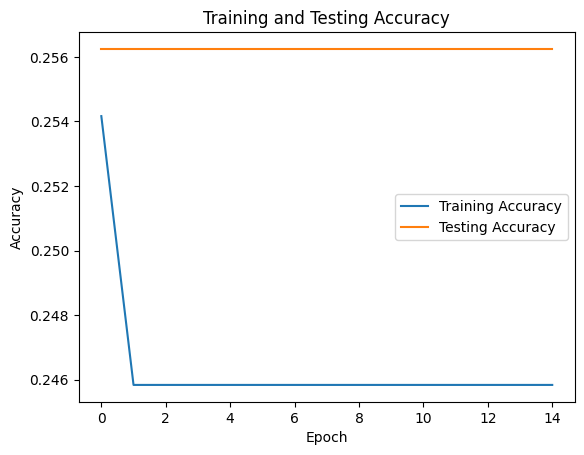

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

train_dataset = CustomImageDataset(images=train_data_images, labels=train_data_labels, transform=preprocess)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomImageDataset(images=test_data_images, labels=test_data_labels, transform=preprocess)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.2)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
loss_fn = nn.CrossEntropyLoss()

n_epochs = 15
epoches = []
train_acc = []
test_acc = []
best_accuracy_sum = 0  # Variable to store the best combined accuracy
best_model_path = "/content/drive/My Drive/Data/COL828/full_finetune_best_model.pth"  # Path to save the best model

for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}/{n_epochs}")
    correct_labels = []
    predicted_labels = []
    probs = []

    model.train()

    for i, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        # forward pass
        text_inputs = processor(text=text_prompts, return_tensors="pt", padding=True, truncation=True).to(device)
        text_features = model.get_text_features(**text_inputs)
        image_features = model.get_image_features(images)

        # Calculate cosine similarity
        cosine_sim = torch.nn.functional.cosine_similarity(image_features.unsqueeze(1), text_features.unsqueeze(0), dim=-1)

        loss = loss_fn(cosine_sim, labels)

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)
        optimizer.step()

        # correct prediction count
        correct_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(torch.argmax(cosine_sim, dim=1).cpu().numpy())
        scheduler.step()

        print(f"Epoch {epoch+1}/{n_epochs}, Batch {i+1}, Loss: {loss.item():.4f}")

    # Calculate training accuracy
    accuracy_train = sum(np.array(correct_labels) == np.array(predicted_labels)) / len(correct_labels)
    print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
    train_acc.append(accuracy_train)
    epoches.append(epoch)

    model.eval()
    true_labels = []
    pred_labels = []

    # Perform testing
    with torch.no_grad():
        for batch in test_dataloader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            # Generate text features
            text_inputs = processor(text=text_prompts, return_tensors="pt", padding=True, truncation=True).to(device)
            text_features = model.get_text_features(**text_inputs)
            image_features = model.get_image_features(images)
            # After the image features extraction step
            # image_features = torch.nn.BatchNorm1d(num_features=image_features.shape[1])(image_features)

            cosine_sim = torch.nn.functional.cosine_similarity(image_features.unsqueeze(1), text_features.unsqueeze(0), dim=-1)

            # Get predictions
            preds = torch.argmax(cosine_sim, dim=1)

            # Collect true and predicted labels
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # Calculate testing accuracy
    accuracy_test = sum(np.array(true_labels) == np.array(pred_labels)) / len(true_labels)
    print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")
    test_acc.append(accuracy_test)

    # Calculate the sum of training and testing accuracy
    accuracy_sum = accuracy_train + accuracy_test

    # Save the best model based on the maximum (train + test) accuracy
    if accuracy_sum > best_accuracy_sum:
        best_accuracy_sum = accuracy_sum
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with combined accuracy {best_accuracy_sum * 100:.2f}%")

# Plot accuracy: train and test accuracy vs. epoch in the same graph
plt.plot(epoches, train_acc, label='Training Accuracy')
plt.plot(epoches, test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()


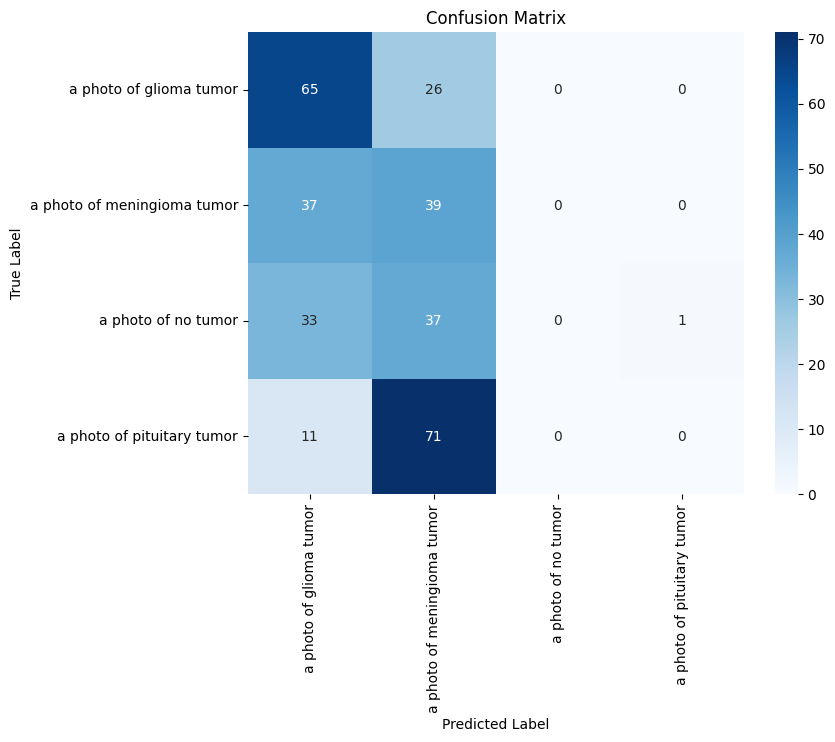

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


model.eval()

# Initialize lists to collect true labels and predicted labels
true_labels = []
pred_labels = []

# Perform testing
with torch.no_grad():
    for batch in test_dataloader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        # Generate text features
        text_inputs = processor(text=text_prompts, return_tensors="pt", padding=True, truncation=True).to(device)
        text_features = model.get_text_features(**text_inputs)
        image_features = model.get_image_features(images)

        # Calculate cosine similarity
        cosine_sim = torch.nn.functional.cosine_similarity(image_features.unsqueeze(1), text_features.unsqueeze(0), dim=-1)

        # Get predictions
        preds = torch.argmax(cosine_sim, dim=1)

        # Collect true and predicted labels
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=text_prompts, yticklabels=text_prompts)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
